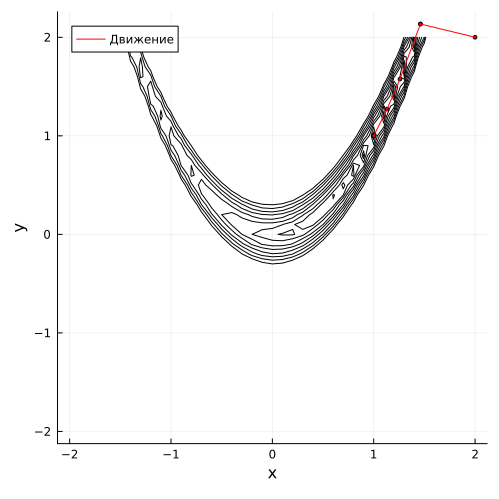

Точка минимума: [0.9999942529858412, 0.999988482684302]
кол-во итераций: 9

Точка минимума: [1.0000004348038654, 1.0000009402747039]
кол-во итераций: 12

Точка минимума: [0.9982857690349805, 0.9965651055917725]
кол-во итераций: 33

Точка минимума: [1.0000000150972654, 1.0000000304021313]
кол-во итераций: 9

Точка минимума: [1.0000000150972654, 1.0000000304021313]
кол-во итераций: 9



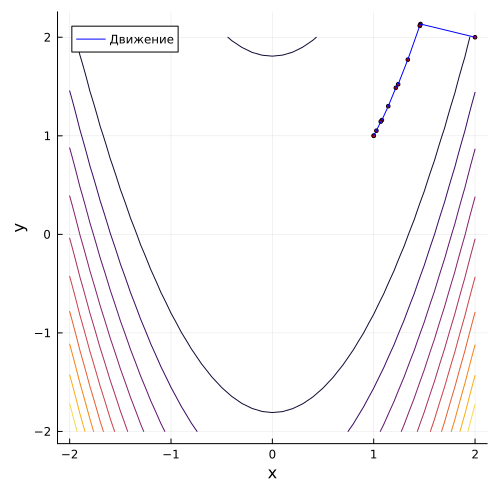

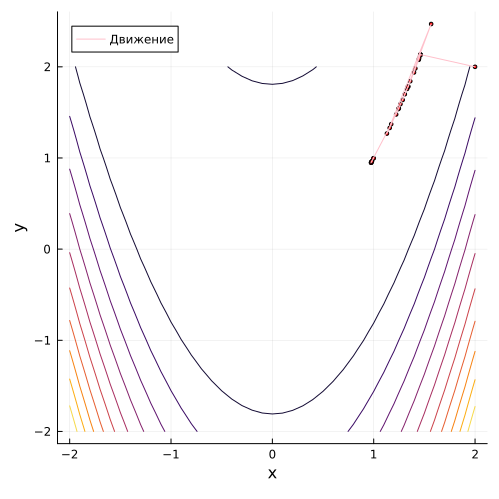

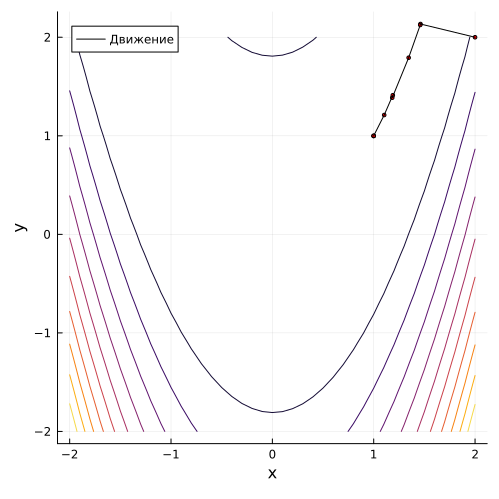

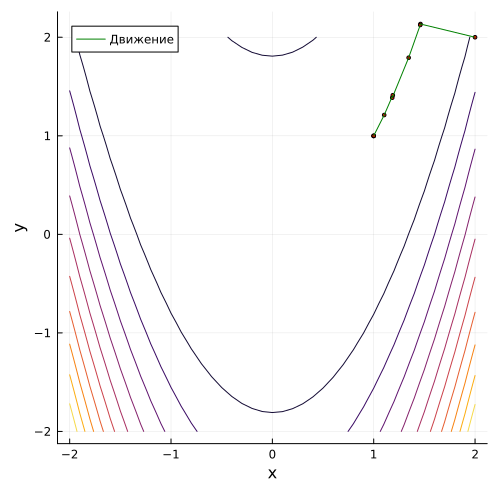

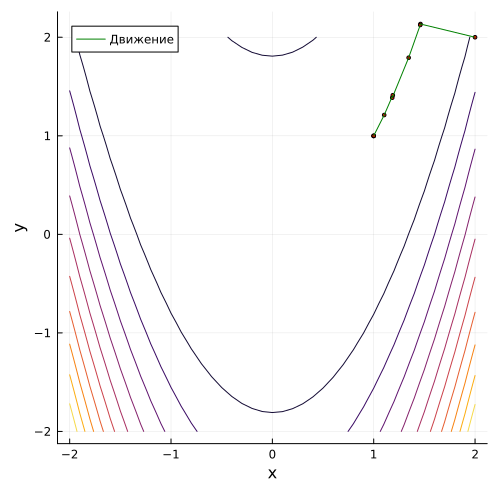

In [ ]:
using LinearAlgebra
using Plots

gr()

function df(f, x::Vector{Float64}, i, h=1e-5)
    x_plus = copy(x)
    x_minus = copy(x)
    
    x_plus[i] += h
    x_minus[i] -= h
    
    df_dx = (f(x_plus) - f(x_minus)) / (2h)
    
    return df_dx
end

function gradient(f, x::Vector{Float64})
    grad = []
    for i in 1:length(x)
        push!(grad, df(f, x, i))
    end
    return grad
end

function swann_method(f, x0, h=0.1)
    first = x0
    second = x0 + h
    if f(second) > f(first)
        h = -h
        first, second = second, second + h
    end
    last = second + h
    
    while f(last) < f(second)
        h *= 2
        first, second, last = second, last, last + h
    end

    if second > last
        first, second, last = last, second, first
    end

    return first, last
end

function golden_section_search(f, a, b, eps=1e-5)
    phi = (sqrt(5) - 1) / 2 
    x1 = b - phi * (b - a)
    x2 = a + phi * (b - a)
    
    while abs(b - a) > eps
        if f(x1) <= f(x2)
            b = x2
        else
            a = x1
        end
        x1 = b - phi * (b - a)
        x2 = a + phi * (b - a)
    end
    
    return (a + b) / 2
end


function conjugate_gradient(f, x0)
    eps1, eps2 = 1e-6, 1e-10
    x = x0
    prev_x = copy(x)
    grad = gradient(f, x)
    d = -grad
    trajectory = [x]
    
    while true
        prev_grad=copy(grad)
        l, r = swann_method(alpha -> f(x + alpha * d), 1e-7)
        alpha = golden_section_search(alpha -> f(x + alpha * d), l, r)
        x += alpha * d
        grad = gradient(f, x)

        if norm(x - prev_x) < eps1 || norm(f(x) - f(prev_x)) < eps2
            break
        end

        beta = dot(grad, grad) / dot(prev_grad, prev_grad)
        d = -grad + beta * d
        prev_x = copy(x)
        push!(trajectory, x)
    end
    
    return x, trajectory
end

function polak_rebier(f, x0)
    eps1, eps2 = 1e-6, 1e-10
    x = x0
    prev_x = copy(x)
    grad = gradient(f, x)
    d = -grad
    trajectory = [x]
    
    while true
        prev_grad=copy(grad)
        l, r = swann_method(alpha -> f(x + alpha * d), 1e-7)
        alpha = golden_section_search(alpha -> f(x + alpha * d), l, r)
        x += alpha * d
        grad = gradient(f, x)

        if norm(x - prev_x) < eps1 || norm(f(x) - f(prev_x)) < eps2
            break
        end

        beta = dot(grad, (grad-prev_grad)) / dot(prev_grad, prev_grad)
        d = -grad + beta * d
        prev_x = copy(x)
        push!(trajectory, x)
    end
    
    return x, trajectory
end

function hestens_stifel(f, x0)
    eps1, eps2 = 1e-6, 1e-10
    x = x0
    prev_x = copy(x)
    grad = gradient(f, x)
    d = -grad
    trajectory = [x]
    
    while true
        prev_grad=copy(grad)
        prev_d = copy(d)
        l, r = swann_method(alpha -> f(x + alpha * d), 1e-7)
        alpha = golden_section_search(alpha -> f(x + alpha * d), l, r)
        x += alpha * d
        grad = gradient(f, x)

        if norm(x - prev_x) < eps1 || norm(f(x) - f(prev_x)) < eps2
            break
        end

        beta = dot(grad, (grad-prev_grad)) / dot(prev_d, (grad-prev_grad))
        d = -grad + beta * prev_d
        prev_x = copy(x)
        push!(trajectory, x)
    end
    
    return x, trajectory
end

function dai_yuan(f, x0)
    eps1, eps2 = 1e-6, 1e-10
    x = x0
    prev_x = copy(x)
    grad = gradient(f, x)
    d = -grad
    trajectory = [x]
    
    while true
        prev_grad=copy(grad)
        l, r = swann_method(alpha -> f(x + alpha * d), 1e-7)
        alpha = golden_section_search(alpha -> f(x + alpha * d), l, r)
        x += alpha * d
        grad = gradient(f, x)

        if norm(x - prev_x) < eps1 || norm(f(x) - f(prev_x)) < eps2
            break
        end

        beta = dot(grad, (grad-prev_grad)) / dot(d, (grad-prev_grad))
        d = -grad + beta * d
        prev_x = copy(x)
        push!(trajectory, x)
    end
    
    return x, trajectory
end

function dickson(f, x0)
    eps1, eps2 = 1e-6, 1e-10
    x = x0
    prev_x = copy(x)
    grad = gradient(f, x)
    d = -grad
    trajectory = [x]
    
    while true
        prev_grad=copy(grad)
        l, r = swann_method(alpha -> f(x + alpha * d), 1e-7)
        alpha = golden_section_search(alpha -> f(x + alpha * d), l, r)
        x += alpha * d
        grad = gradient(f, x)

        if norm(x - prev_x) < eps1 || norm(f(x) - f(prev_x)) < eps2
            break
        end

        beta = dot(grad, grad) / dot(d, prev_grad)
        d = -grad + beta * d
        prev_x = copy(x)
        push!(trajectory, x)
    end
    
    return x, trajectory
end


func(x, y) = (1-x)^2 +100*(y-x^2)^2
f(x) = func(x[1],x[2])

x0 = [2.0, 2.0]

x = -2:0.1:2
y = -2:0.1:2
levels = []
for i in 1:10
    push!(levels, i^2*0.1)
end

x_min, trajectory = conjugate_gradient(f, x0)
x_coords = [point[1] for point in trajectory]
y_coords = [point[2] for point in trajectory]
contour(x, y, (x, y) -> f([x, y]), levels = levels, xlabel="x", ylabel="y", colorbar=false, size=(500, 500))
scatter!(x_coords, y_coords, markersize=2, markershape=:circle, markercolor=:red, label = "")
p = plot!(x_coords, y_coords, label="Движение", line=:red)
println("Точка минимума: $x_min\nкол-во итераций: $(length(trajectory)-1)\n")
display(p)


x_min, trajectory = polak_rebier(f, x0)
x_coords = [point[1] for point in trajectory]
y_coords = [point[2] for point in trajectory]
contour(x, y, (x, y) -> f([x, y]), levels = 10, xlabel="x", ylabel="y", colorbar=false, size=(500, 500))
scatter!(x_coords, y_coords, markersize=2, markershape=:circle, markercolor=:red, label = "")
p = plot!(x_coords, y_coords, label="Движение", line=:blue)
println("Точка минимума: $x_min\nкол-во итераций: $(length(trajectory)-1)\n")
display(p)

x_min, trajectory = dickson(f, x0)
x_coords = [point[1] for point in trajectory]
y_coords = [point[2] for point in trajectory]
contour(x, y, (x, y) -> f([x, y]), levels = 10, xlabel="x", ylabel="y", colorbar=false, size=(500, 500))
scatter!(x_coords, y_coords, markersize=2, markershape=:circle, markercolor=:red, label = "")
p = plot!(x_coords, y_coords, label="Движение", line=:pink)
println("Точка минимума: $x_min\nкол-во итераций: $(length(trajectory)-1)\n")
display(p)

x_min, trajectory = dai_yuan(f, x0)
x_coords = [point[1] for point in trajectory]
y_coords = [point[2] for point in trajectory]
contour(x, y, (x, y) -> f([x, y]), levels = 10, xlabel="x", ylabel="y", colorbar=false, size=(500, 500))
scatter!(x_coords, y_coords, markersize=2, markershape=:circle, markercolor=:red, label = "")
p = plot!(x_coords, y_coords, label="Движение", line=:black)
println("Точка минимума: $x_min\nкол-во итераций: $(length(trajectory)-1)\n")
display(p)

x_min, trajectory = hestens_stifel(f, x0)
x_coords = [point[1] for point in trajectory]
y_coords = [point[2] for point in trajectory]
contour(x, y, (x, y) -> f([x, y]), levels = 10, xlabel="x", ylabel="y", colorbar=false, size=(500, 500))
scatter!(x_coords, y_coords, markersize=2, markershape=:circle, markercolor=:red, label = "")
p = plot!(x_coords, y_coords, label="Движение", line=:green)
println("Точка минимума: $x_min\nкол-во итераций: $(length(trajectory)-1)\n")
display(p)